# About the project
Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!



To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

# Data Description
- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.<br>
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.<br>
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. <br>Passengers in cryosleep are confined to their cabins.<br>
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.<br>
- Destination - The planet the passenger will be debarking to.<br>
- Age - The age of the passenger.<br>
- VIP - Whether the passenger has paid for special VIP service during the voyage.<br>
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.<br>
- Name - The first and last names of the passenger.<br>
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.<br>

# 1. Import libraries and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
import scipy.stats as stat
import pylab
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# 2. Feature Engineering

### 2.1 EDA - Basic
- Check if columns are correctly classified as numerical and categorical (sometimes numerical columns are marked categorical or vice versa)
- Check if any numerical features have extremely high values (sometimes NaNs are coded as high number like 99999999)
- Check cardinality of categorical features (if very high cardinality then using one-hot encoding may create a lot of features)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


- The actual categorical features (HomePlanet, Cabin, Destination, and Name) are already encoded as object. We will later use one-hot encoding to deal with it.
- Numerical features already classified correctly

In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


We can see that there are no significantly high values, so there is no encoding done for NaNs

In [6]:
categorical = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']
numerical = ['Age', 'RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [7]:
for c in categorical:
    print(c)
    print(df[c].nunique())
    print(df[c].unique())
    print('\n')

HomePlanet
3
['Europa' 'Earth' 'Mars' nan]


CryoSleep
2
[False True nan]


Destination
3
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]


VIP
2
[False True nan]


Transported
2
[False  True]




The data can be considered low cardinality

In [8]:
del df['PassengerId']
categorical = ['HomePlanet','Cabin','Name', 'CryoSleep', 'Destination', 'VIP']
numerical = ['Age', 'RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

### 2.2 Handle missing data

In [9]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Numerical columns

In [10]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

def draw_plot_impute(df,feature):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    df[feature].plot(kind='kde', ax=ax)
    df[feature+'_median'].plot(kind='kde', ax=ax, color='red')
    df[feature+'_random'].plot(kind='kde', ax=ax, color='green')
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')
    plt.show()

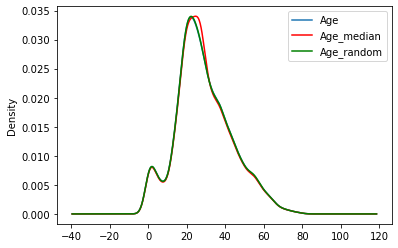

In [11]:
df_age=pd.read_csv('train.csv', usecols=['Age','Transported'])
impute_nan(df_age,'Age',df.Age.median())
draw_plot_impute(df_age,'Age')

There is less distortion in variance by replacing with random sample 

In [12]:
# Replace Age column with random sample
def impute_nan_random(df,feature):
    random_sample=df[feature].dropna().sample(df[feature].isnull().sum(),random_state=0)
    random_sample.index=df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature]=random_sample

In [13]:
impute_nan_random(df,'Age')

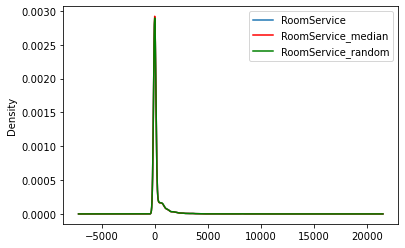

In [14]:
df_bills=pd.read_csv('train.csv', usecols=[ 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Transported'])
impute_nan(df_bills,'RoomService',df.Age.median())
draw_plot_impute(df_bills,'RoomService')

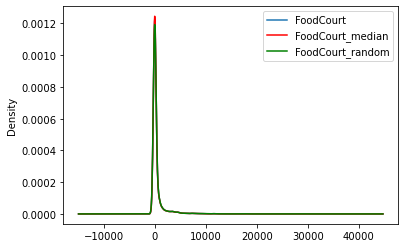

In [15]:
df_bills=pd.read_csv('train.csv', usecols=[ 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Transported'])
impute_nan(df_bills,'FoodCourt',df.Age.median())
draw_plot_impute(df_bills,'FoodCourt')

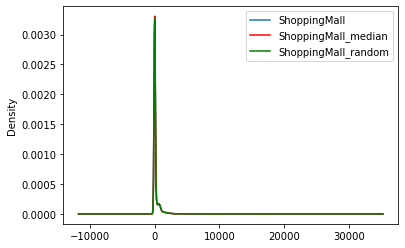

In [16]:
df_bills=pd.read_csv('train.csv', usecols=[ 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Transported'])
impute_nan(df_bills,'ShoppingMall',df.Age.median())
draw_plot_impute(df_bills,'ShoppingMall')

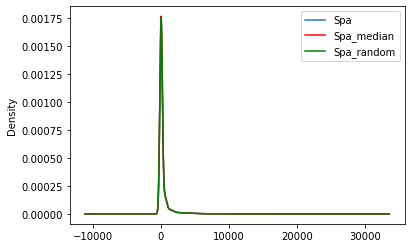

In [17]:
df_bills=pd.read_csv('train.csv', usecols=[ 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Transported'])
impute_nan(df_bills,'Spa',df.Age.median())
draw_plot_impute(df_bills,'Spa')

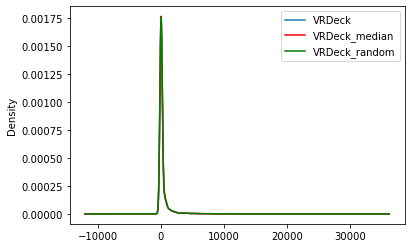

In [18]:
df_bills=pd.read_csv('train.csv', usecols=[ 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Transported'])
impute_nan(df_bills,'VRDeck',df.Age.median())
draw_plot_impute(df_bills,'VRDeck')

Bill related columns have less distortion in variance by replacing with random sample

In [19]:
# Replace bill related column with random sample
for feature in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    impute_nan_random(df,feature)

In [20]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

Categorical column

In [21]:
df[categorical].isnull().mean()

HomePlanet     0.023122
Cabin          0.022892
Name           0.023007
CryoSleep      0.024963
Destination    0.020936
VIP            0.023352
dtype: float64

In [22]:
def impute_nan_mode(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [23]:
for c in ['HomePlanet','CryoSleep','Destination','VIP']:
    impute_nan_mode(df,c)

Unlike the other categorical columns, Cabin and Name have so many unique value so we should handle it differently

In [24]:
for c in ['Name','Cabin']:
    impute_nan_random(df,c)

We want to add new column Deck and Side so that column Cabin can be more informative.

In [25]:
df['Deck'] = df.Cabin.str.split('/').str[0]
df['Side'] = df.Cabin.str.split('/').str[-1]

In [26]:
categorical = ['HomePlanet','Cabin','Name', 'CryoSleep', 'Destination', 'VIP','Deck','Side']
numerical = ['Age', 'RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

### 2.3 Treating the Outliers

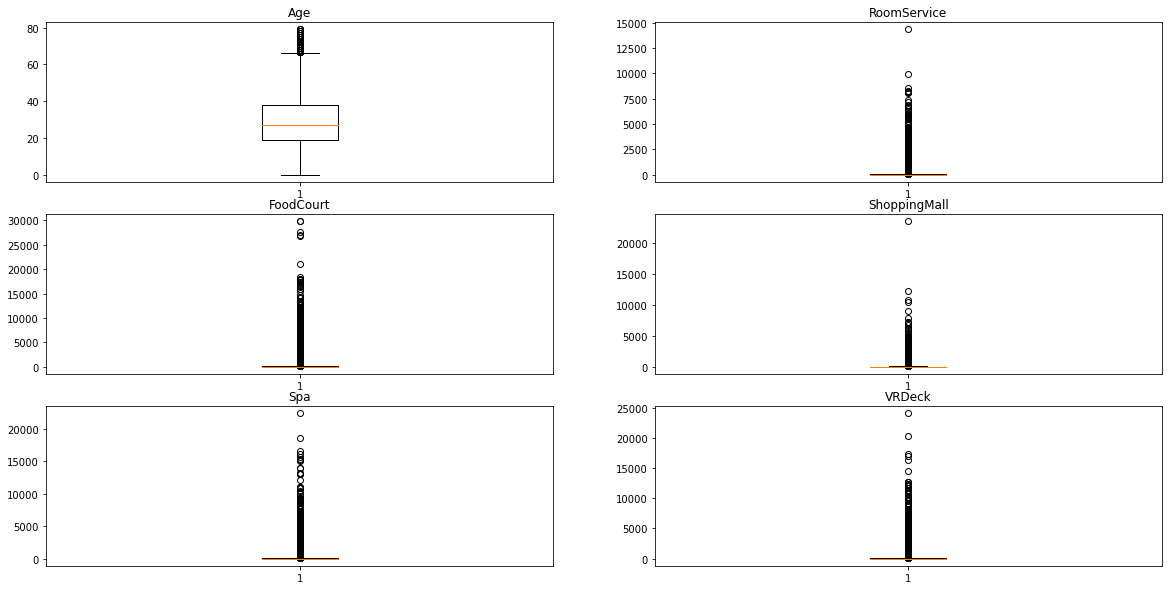

In [27]:
rows, columns = 3, 2
n_row, n_col = 0, 0
c = 0
fig, axes = plt.subplots(rows, columns, figsize=(20,10))
for i in range(rows):
    for j in range(columns):
        axes[i][j].boxplot(df[numerical[c]])
        axes[i][j].set_title(numerical[c])
        c = c + 1
    
plt.show()

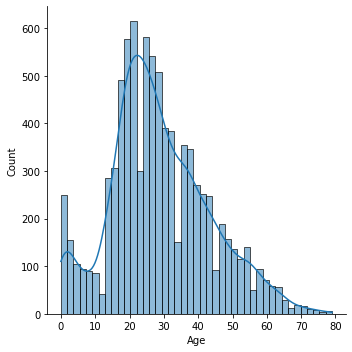

In [28]:
sns.displot(df['Age'],kde=True)

Text(0, 0.5, 'No of passenger')

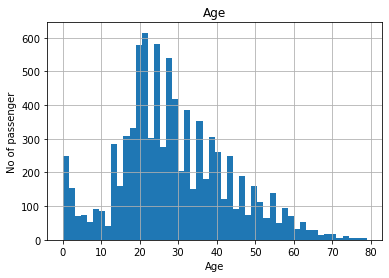

In [29]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

In [30]:
df['Age'].describe()

count    8693.000000
mean       28.834119
std        14.486687
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [31]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

uppper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std()
print(lower_boundary,uppper_boundary,df['Age'].mean())

-14.625942081194879 72.29418089403279 28.834119406418957


In [32]:
df.loc[df['Age']>=72,'Age']=72

Text(0, 0.5, 'No of passenger')

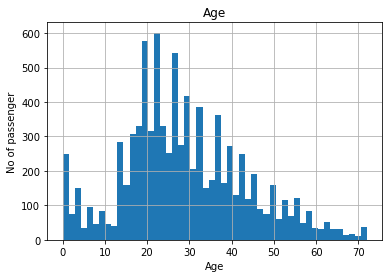

In [33]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

### 2.4 Scaling the Data

###### Check distribution of data

In [34]:
numerical

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

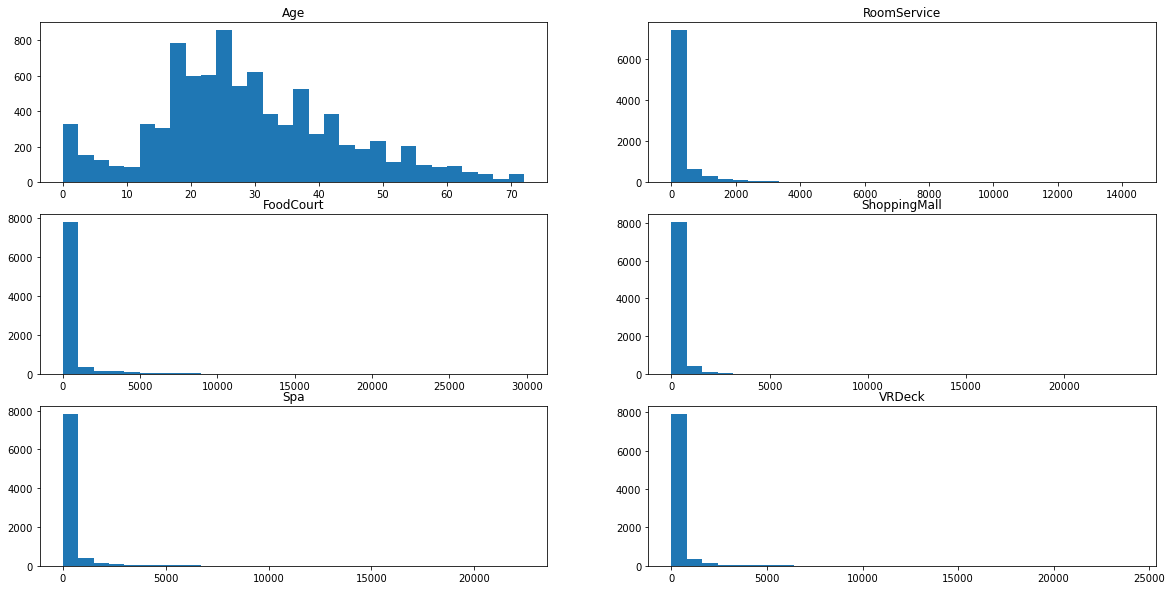

In [35]:
rows, columns = 3, 2
n_row, n_col = 0, 0
c = 0
fig, axes = plt.subplots(rows, columns, figsize=(20,10))
for i in range(rows):
    for j in range(columns):
        axes[i][j].hist(df[numerical[c]],bins=30)
        axes[i][j].set_title(numerical[c])
        c = c + 1
    
plt.show()

In [36]:
def plot_data(series):
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    series.hist()
    plt.subplot(1,2,2)
    stat.probplot(series,dist='norm',plot=pylab)
    plt.show()

def multiple_plot(series):
    if 0 in series:
        print('Without Transformation')
        plot_data(series)
        print('Logarithmic Transformation')
        plot_data(np.log1p(series))
        print('Reciprocal Transformation')
        plot_data(1/(series+1))
        print('Exponential Transformation')
        plot_data(series**(1/1.2))
        print('Square Root Transformation')
        plot_data(series**(0.5))
        print('Boxcox Transformation')
        series,parameters=stat.boxcox(series+1)
        plot_data(pd.DataFrame(series)[0])
    else:
        print('Without Transformation')
        plot_data(series)
        print('Logarithmic Transformation')
        plot_data(np.log(series))
        print('Reciprocal Transformation')
        plot_data(1/series)
        print('Exponential Transformation')
        plot_data(series**(1/1.2))
        print('Square Root Transformation')
        plot_data(series**(0.5))
        print('Boxcox Transformation')
        series,parameters=stat.boxcox(series)
        plot_data(pd.DataFrame(series)[0])
    plt.show()

Without Transformation


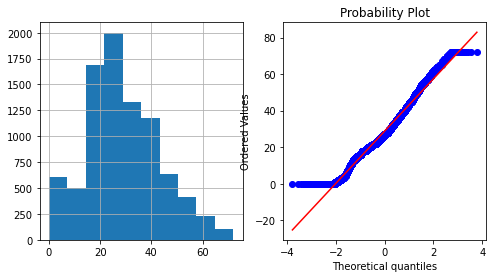

Logarithmic Transformation


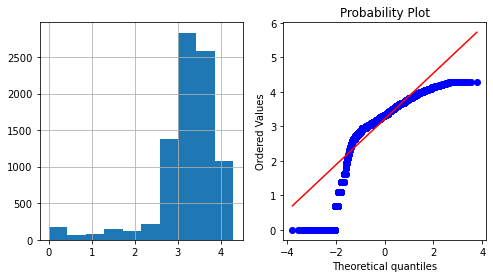

Reciprocal Transformation


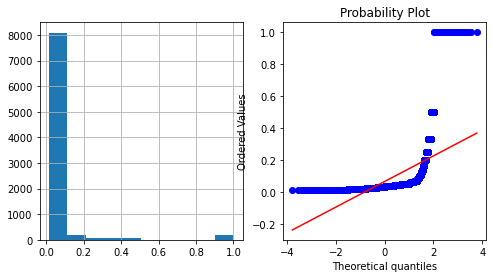

Exponential Transformation


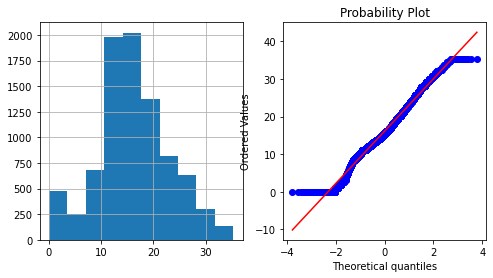

Square Root Transformation


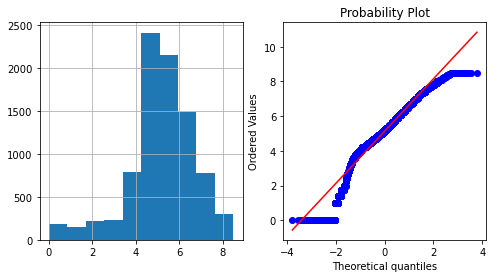

Boxcox Transformation


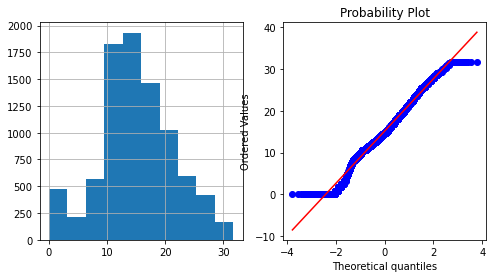

In [37]:
multiple_plot(df.Age)

It look like the best QQ plot is still the one without transformation.

Without Transformation


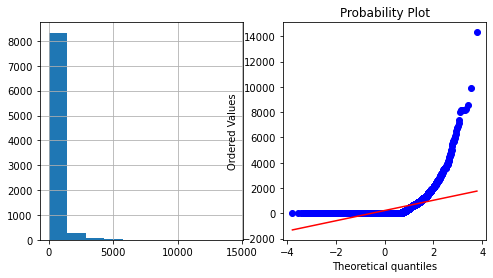

Logarithmic Transformation


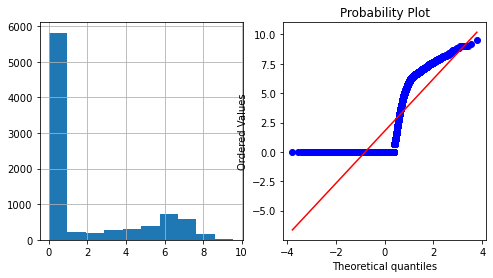

Reciprocal Transformation


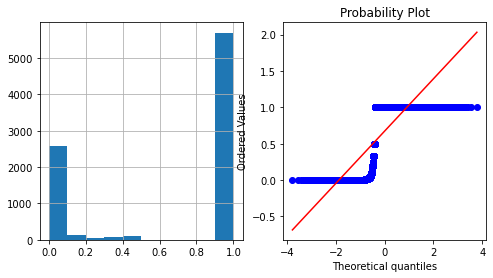

Exponential Transformation


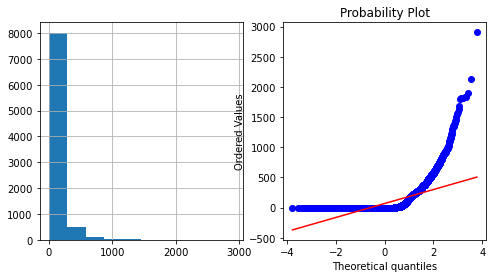

Square Root Transformation


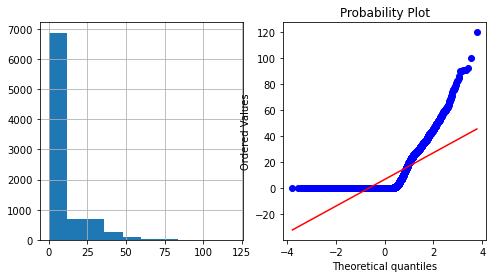

Boxcox Transformation


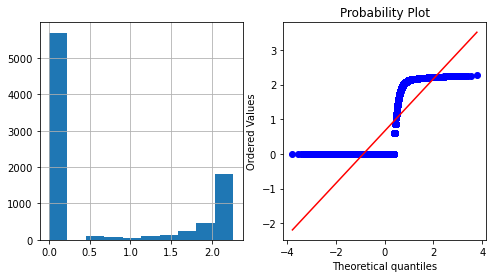

In [38]:
multiple_plot(df.RoomService)

There is no good transformation so that we can have gaussian distribution. The other bills related columns should also be the same so we can ignore it as right now.

### 2.5 Feature Importance 

In [39]:
from IPython.display import display

In [40]:
df_group = df[categorical]

In [41]:
transported_mean = df.Transported.mean()

In [42]:
for c in categorical:
    df_group = df.groupby(c).Transported.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - transported_mean
    df_group['risk'] = df_group['mean'] / transported_mean
    display(df_group)

,mean,count,diff,risk
HomePlanet,,,,
Earth,0.427649,4803,-0.075974,0.849145
Europa,0.658846,2131,0.155222,1.308210
Mars,0.523024,1759,0.019401,1.038523


,mean,count,diff,risk
Cabin,,,,
A/0/P,0.5,2,-0.003624,0.992805
A/0/S,0.0,2,-0.503624,0.000000
A/1/S,1.0,3,0.496376,1.985610
A/10/P,0.0,1,-0.503624,0.000000
A/10/S,1.0,1,0.496376,1.985610
...,...,...,...,...
T/0/P,0.0,1,-0.503624,0.000000
T/1/P,0.0,1,-0.503624,0.000000
T/2/P,0.0,1,-0.503624,0.000000


,mean,count,diff,risk
Name,,,,
Aard Curle,0.0,1,-0.503624,0.00000
Aarjel Jaff,0.0,1,-0.503624,0.00000
Aarjel Rhuba,0.0,1,-0.503624,0.00000
Aark Ches,0.0,1,-0.503624,0.00000
Aark Homin,1.0,1,0.496376,1.98561
...,...,...,...,...
Zosmark Unaasor,1.0,1,0.496376,1.98561
Zosmas Ineedeve,1.0,1,0.496376,1.98561
Zosmas Mormonized,1.0,1,0.496376,1.98561


,mean,count,diff,risk
CryoSleep,,,,
False,0.335042,5656,-0.168581,0.665264
True,0.817583,3037,0.313960,1.623401


,mean,count,diff,risk
Destination,,,,
55 Cancri e,0.610000,1800,0.106376,1.211222
PSO J318.5-22,0.503769,796,0.000145,1.000288
TRAPPIST-1e,0.472199,6097,-0.031424,0.937604


,mean,count,diff,risk
VIP,,,,
False,0.506475,8494,0.002852,1.005662
True,0.381910,199,-0.121714,0.758323


,mean,count,diff,risk
Deck,,,,
A,0.496124,258,-0.007500,0.985109
B,0.726817,798,0.223193,1.443175
C,0.677546,766,0.173922,1.345341
D,0.447154,492,-0.056469,0.887874
E,0.358659,895,-0.144964,0.712157
F,0.441495,2863,-0.062129,0.876637
G,0.514144,2616,0.010520,1.020889
T,0.200000,5,-0.303624,0.397122


,mean,count,diff,risk
Side,,,,
P,0.452071,4298,-0.051553,0.897636
S,0.554039,4395,0.050415,1.100105


###### Mutual Information

In [43]:
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score, adjusted_mutual_info_score, r2_score, mean_squared_error

In [44]:
def fn_mutual_info_score(series):
    return mutual_info_score(series,y)

def fn_norm_mutual_info_score(series):
    return normalized_mutual_info_score(series,y)

def fn_adj_mutual_info_score(series):
    return adjusted_mutual_info_score(series,y)

In [45]:
y = df.Transported
df_temp = df.drop('Transported',axis=1)
mi = df_temp[categorical].apply(fn_mutual_info_score)
mi =pd.concat([mi,df_temp[categorical].apply(fn_norm_mutual_info_score)],axis=1)
mi =pd.concat([mi,df_temp[categorical].apply(fn_adj_mutual_info_score)],axis=1)
mi.columns = ['mi','norm_mi','adj_mi']
mi.sort_values(by=['mi'],ascending=False)

,mi,norm_mi,adj_mi
Name,0.676096,0.138997,0.000126
Cabin,0.542883,0.116143,0.005731
CryoSleep,0.112254,0.167521,0.167450
Deck,0.022430,0.019018,0.018675
HomePlanet,0.018581,0.022004,0.021871
Destination,0.006113,0.008223,0.008069
Side,0.005207,0.007513,0.007431
VIP,0.000700,0.001746,0.001602


We can see that CryoSleep, Deck and HomePlanet have high mutual info score compare to the other  and hence are useful for the model.

###### Correlation

In [46]:
corr = df[numerical].corrwith(df.Transported)
corr

Age            -0.074547
RoomService    -0.240188
FoodCourt       0.049914
ShoppingMall    0.010015
Spa            -0.217003
VRDeck         -0.203949
dtype: float64

<AxesSubplot:>

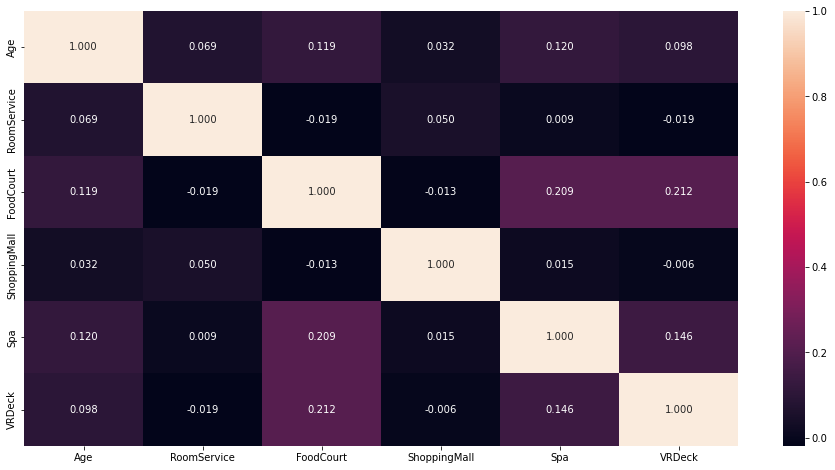

In [47]:
plt.figure(figsize=(16, 8))
sns.heatmap(df[numerical].corr(), annot=True, fmt='.3f')

# 3. Categorical Encoding

###### One Hot Encoding

In [48]:
df_ohe = pd.get_dummies(df[['HomePlanet','Destination','Side']],drop_first=True)
df_ohe

,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Side_S
0,1,0,0,1,0
1,0,0,0,1,1
2,1,0,0,1,1
3,1,0,0,1,1
4,0,0,0,1,1
...,...,...,...,...,...
8688,1,0,0,0,0
8689,0,0,1,0,1
8690,0,0,0,1,1
8691,1,0,0,0,1


###### Label Nominal Encoding

In [49]:
deck_dict={'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7}
df_lne = df.Deck.map(deck_dict)

###### Bool Encoding

In [50]:
df['CryoSleep'] = df['CryoSleep'].astype('int')
df['VIP'] = df['VIP'].astype('int')
df['Transported'] = df['Transported'].astype('int')

In [51]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'Deck', 'Side'],
      dtype='object')

In [52]:
df_other = df[['CryoSleep', 'Age', 'VIP','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']]

In [53]:
df_clean = pd.concat([df_ohe, df_lne,df_other], axis=1, join='inner')

# 4. Model

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import classification_report,accuracy_score

In [55]:
X_train,X_test,y_train,y_test=train_test_split(df_clean.drop('Transported',axis=1),df_clean['Transported'],test_size=0.3,random_state=1)

In [56]:
def predict_logistic(X_train,y_train,X_test,y_test,C=1):
    classifier=LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    y_pred1=classifier.predict_proba(X_test)

    from sklearn.metrics import accuracy_score,roc_auc_score
    print("Accuracy_score_predict: {}".format(accuracy_score(y_test,y_pred)))
    print("Roc_auc_score_predict_proba: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

def predict_randomforest(X_train,y_train,X_test,y_test):
    classifier=RandomForestClassifier()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    y_pred1=classifier.predict_proba(X_test)

    from sklearn.metrics import accuracy_score,roc_auc_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    print("Roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

In [57]:
for C in [0.01, 0.1, 1, 10]:
    print('C: ',C)
    predict_logistic(X_train,y_train,X_test,y_test,C=C)

C:  0.01
Accuracy_score_predict: 0.8044478527607362
Roc_auc_score_predict_proba: 0.8737730459162698
C:  0.1
Accuracy_score_predict: 0.7952453987730062
Roc_auc_score_predict_proba: 0.873597777264127
C:  1
Accuracy_score_predict: 0.7960122699386503
Roc_auc_score_predict_proba: 0.8732919393476359
C:  10
Accuracy_score_predict: 0.7952453987730062
Roc_auc_score_predict_proba: 0.8732519451585563


In [58]:
predict_randomforest(X_train,y_train,X_test,y_test)

Accuracy_score: 0.7948619631901841
Roc_auc_score: 0.8674027950056669


### Feature Selection

In [59]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [60]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [61]:
feature_sel_model.get_support()

array([ True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True])

In [62]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 14
selected features: 12


In [63]:
selected_feat

Index(['HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_TRAPPIST-1e',
       'Side_S', 'Deck', 'CryoSleep', 'Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

In [64]:
X_train=X_train[selected_feat]
X_test=X_test[selected_feat]

In [65]:
for C in [0.01, 0.1, 1, 10]:
    print('C: ',C)
    predict_logistic(X_train,y_train,X_test,y_test,C=C)

C:  0.01
Accuracy_score_predict: 0.803680981595092
Roc_auc_score_predict_proba: 0.8735913076158934
C:  0.1
Accuracy_score_predict: 0.7960122699386503
Roc_auc_score_predict_proba: 0.873400747067926
C:  1
Accuracy_score_predict: 0.7956288343558282
Roc_auc_score_predict_proba: 0.8731260810929236
C:  10
Accuracy_score_predict: 0.7952453987730062
Roc_auc_score_predict_proba: 0.873107848447902


In [66]:
predict_randomforest(X_train,y_train,X_test,y_test)

Accuracy_score: 0.799079754601227
Roc_auc_score: 0.8682065017612148


### Feature Scaling

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler=MinMaxScaler()
scaler.fit(df[numerical])

MinMaxScaler()

In [69]:
df_num = pd.DataFrame(scaler.transform(df[numerical]),columns=numerical)

In [70]:
df_clean_scaled = pd.concat([df_num, df_clean.drop(numerical,axis=1)], axis=1, join='inner')

In [71]:
df_clean_scaled

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Side_S,Deck,CryoSleep,VIP,Transported
0,0.541667,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,1,0,1,0,0,0
1,0.333333,0.007608,0.000302,0.001064,0.024500,0.001823,0,0,0,1,1,5,0,0,1
2,0.805556,0.003001,0.119948,0.000000,0.299670,0.002030,1,0,0,1,1,0,0,1,0
3,0.458333,0.000000,0.043035,0.015793,0.148563,0.007997,1,0,0,1,1,0,0,0,0
4,0.222222,0.021149,0.002348,0.006428,0.025214,0.000083,0,0,0,1,1,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.569444,0.000000,0.228726,0.000000,0.073322,0.003066,1,0,0,0,0,0,0,1,0
8689,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,0,1,6,1,0,0
8690,0.361111,0.000000,0.000000,0.079687,0.000045,0.000000,0,0,0,1,1,6,0,0,1
8691,0.444444,0.000000,0.035186,0.000000,0.015753,0.134049,1,0,0,0,1,4,0,0,0


In [72]:
X_train,X_test,y_train,y_test=train_test_split(df_clean_scaled.drop('Transported',axis=1),df_clean['Transported'],test_size=0.3)

In [73]:
for C in [0.01, 0.1, 1, 10]:
    print('C: ',C)
    predict_logistic(X_train,y_train,X_test,y_test,C=C)

C:  0.01
Accuracy_score_predict: 0.727760736196319
Roc_auc_score_predict_proba: 0.771951393070872
C:  0.1
Accuracy_score_predict: 0.7480828220858896
Roc_auc_score_predict_proba: 0.8000080568519703
C:  1
Accuracy_score_predict: 0.7661042944785276
Roc_auc_score_predict_proba: 0.8472917803643342
C:  10
Accuracy_score_predict: 0.776840490797546
Roc_auc_score_predict_proba: 0.8643217306823743


In [74]:
predict_randomforest(X_train,y_train,X_test,y_test)

Accuracy_score: 0.7756901840490797
Roc_auc_score: 0.8473782297978848


### Feature Selection Again

In [75]:
X_train=X_train[selected_feat]
X_test=X_test[selected_feat]

In [76]:
for C in [0.01, 0.1, 1, 10]:
    print('C: ',C)
    predict_logistic(X_train,y_train,X_test,y_test,C=C)

C:  0.01
Accuracy_score_predict: 0.7273773006134969
Roc_auc_score_predict_proba: 0.7708343134856411
C:  0.1
Accuracy_score_predict: 0.7519171779141104
Roc_auc_score_predict_proba: 0.7981446892995596
C:  1
Accuracy_score_predict: 0.7641871165644172
Roc_auc_score_predict_proba: 0.8461176559147879
C:  10
Accuracy_score_predict: 0.776457055214724
Roc_auc_score_predict_proba: 0.8634692922202566


In [77]:
predict_randomforest(X_train,y_train,X_test,y_test)

Accuracy_score: 0.7802914110429447
Roc_auc_score: 0.852059143174376


# Conclusion

Out of all of the model, the best model is the one using logistic regression(C=0.01) and without feature scaling and feature selection.

In [78]:
X_train,X_test,y_train,y_test=train_test_split(df_clean.drop('Transported',axis=1),df_clean['Transported'],test_size=0.3,random_state=1)

In [79]:
classifier=LogisticRegression(solver='liblinear', C=0.01, max_iter=1000)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score_predict: {}".format(accuracy_score(y_test,y_pred)))
print("Roc_auc_score_predict_proba: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score_predict: 0.8044478527607362
Roc_auc_score_predict_proba: 0.8737730459162698


In [80]:
X_test

,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Side_S,Deck,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
1454,1,0,0,0,1,0,0,32.0,0,54.0,3782.0,0.0,21.0,5.0
218,0,0,1,0,1,6,1,27.0,0,0.0,0.0,0.0,0.0,0.0
7866,0,0,1,0,1,5,0,24.0,0,86.0,669.0,1.0,0.0,0.0
7622,0,0,0,1,1,6,1,38.0,0,0.0,0.0,0.0,0.0,0.0
4108,0,1,1,0,0,5,0,32.0,0,192.0,0.0,441.0,18.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,0,0,0,1,0,5,0,13.0,0,12.0,0.0,0.0,0.0,1963.0
7620,0,0,0,1,0,4,0,25.0,0,11.0,780.0,0.0,0.0,0.0
7503,0,1,0,1,1,5,1,29.0,0,0.0,0.0,0.0,0.0,0.0
6323,0,0,1,0,0,6,1,32.0,0,0.0,0.0,0.0,0.0,0.0


# 6. Testing the data

In [81]:
df = pd.read_csv('test.csv')

### Handle the missing values

In [82]:
df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [83]:
impute_nan_random(df,'Age')
for feature in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    impute_nan_random(df,feature)
for c in ['HomePlanet','CryoSleep','Destination','VIP']:
    impute_nan_mode(df,c)
for c in ['Name','Cabin']:
    impute_nan_random(df,c)

In [84]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

### Treating the outliers

In [85]:
uppper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std()
print(lower_boundary,uppper_boundary,df['Age'].mean())

-14.012870336720304 71.43395988546942 28.71054477437456


In [86]:
df.loc[df['Age']>=71,'Age']=71

### Categorical encoding

In [87]:
df['Deck'] = df.Cabin.str.split('/').str[0]
df['Side'] = df.Cabin.str.split('/').str[-1]

In [88]:
df_ohe = pd.get_dummies(df[['HomePlanet','Destination','Side']],drop_first=True)
deck_dict={'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7}
df_lne = df.Deck.map(deck_dict)
df['CryoSleep'] = df['CryoSleep'].astype('int')
df['VIP'] = df['VIP'].astype('int')
df_other = df[['CryoSleep', 'Age', 'VIP','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
df_clean = pd.concat([df_ohe, df_lne,df_other], axis=1, join='inner')

In [89]:
df_clean

,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Side_S,Deck,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,0,0,1,1,6,1,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,1,1,5,0,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,1,0,0,0,1,2,1,31.0,0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,1,1,2,0,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0,0,0,1,1,5,0,20.0,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,0,0,1,1,6,1,34.0,0,0.0,0.0,0.0,0.0,0.0
4273,0,0,0,1,1,5,0,42.0,0,0.0,847.0,17.0,10.0,144.0
4274,0,1,0,0,0,3,1,20.0,0,0.0,0.0,0.0,0.0,0.0
4275,1,0,0,1,0,3,0,0.0,0,0.0,2680.0,0.0,0.0,523.0


### Predict

In [90]:
y_pred=classifier.predict(df_clean)

In [91]:
y_pred

array([1, 0, 1, ..., 1, 1, 1])